## Strategies
### Word focused
If the vocabulary is what you are looking at, the next step is to remove the punctuation and the stopwords. 

With the following code, we are going to generate a list of words used in the `Body` column. It won't be extremely useful for the classification task but comparing vocabulary can be very revealing (given the right subset: spam vs. regular emails,etc.).

Once we have a list of words, we can start the vocabulary analysis by coding a counter or using `FreqDist` from the `nltk` library for example.

In [1]:
import pandas as pd
df = pd.read_csv('data/processed/data.csv', index_col='Id')
df

,Title,Body,Tags,CreationDate,Y
Id,,,,,
34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
...,...,...,...,...,...
60467932,C++ The correct way to multiply an integer and...,<p>I try to multiply an integer by a double bu...,<c++>,2020-02-29 17:46:41,LQ_CLOSE
60468018,How can I make a c# application outside of vis...,<p>I'm very new to programming and I'm teachin...,<c#><visual-studio>,2020-02-29 17:55:56,LQ_CLOSE
60468378,WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...,*URLS.PY*\r\n //URLS.PY FILE\r\n fro...,<django><django-views><django-templates>,2020-02-29 18:35:39,LQ_EDIT


In [2]:
from nltk.corpus import stopwords
import string

stop_words = list(string.punctuation)
stop_words += stopwords.words('english')

## Word frequency for the whole dataset

In [3]:
from nltk import word_tokenize
words = []
for text in df['Body']:
    tokens = word_tokenize(text)
    # converts to lower case
    tokens = [tok.lower() for tok in tokens]
    # removes the stopwords
    words += [word for word in tokens if word not in stop_words]

In [14]:
from nltk import FreqDist
import matplotlib.pyplot as plt
FreqDist(words).plot(50);

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
FreqDist(words).most_common(50)

[("''", 383552),
 ('``', 156763),
 ('p', 141212),
 ('/p', 138630),
 ('code', 102247),
 ('gt', 89054),
 ('lt', 85102),
 ('/code', 77058),
 ('--', 55480),
 ('pre', 41219),
 ('/pre', 41134),
 ('1', 38502),
 ('0', 33836),
 ('int', 27461),
 ('string', 26612),
 ('new', 26114),
 ('https', 21984),
 ('2', 21490),
 ('error', 20897),
 ('using', 20874),
 ('like', 20039),
 ('public', 19729),
 ('return', 19705),
 ("n't", 19533),
 ('want', 19448),
 ('file', 17733),
 ('get', 17023),
 ("'m", 16942),
 ('function', 16821),
 ('//', 16190),
 ('class', 15858),
 ('data', 15690),
 ('android', 15439),
 ('href=', 14940),
 ('use', 14872),
 ('/a', 14863),
 ('import', 14034),
 ('name', 13932),
 ("'s", 13619),
 ('3', 13079),
 ('class=', 13018),
 ('void', 12886),
 ('would', 12310),
 ('c', 12304),
 ('value', 11434),
 ('rel=', 11356),
 ('var', 10990),
 ('need', 10988),
 ('help', 10832),
 ('...', 10754)]

## Word frequency for the HQ questions

In [5]:
from nltk import word_tokenize
words_hq = []
for text in df['Body'][df['Y']== 'HQ']:
    tokens = word_tokenize(text)
    # converts to lower case
    tokens = [tok.lower() for tok in tokens]
    # removes the stopwords
    words_hq += [word for word in tokens if word not in stop_words]

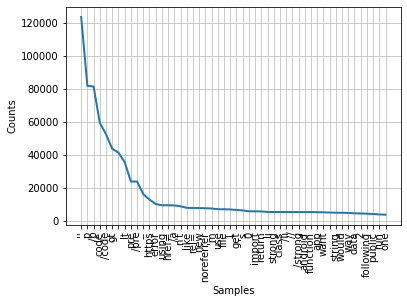

In [6]:
from nltk import FreqDist
import matplotlib.pyplot as plt
FreqDist(words_hq).plot(50);

## Word frequency for LQ_EDIT questions

In [7]:
from nltk import word_tokenize
words_lqe = []
for text in df['Body'][df['Y']== 'LQ_EDIT']:
    tokens = word_tokenize(text)
    # converts to lower case
    tokens = [tok.lower() for tok in tokens]
    # removes the stopwords
    words_lqe += [word for word in tokens if word not in stop_words]

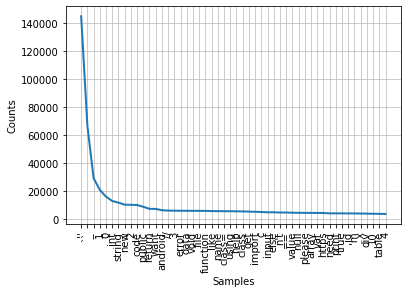

In [8]:
from nltk import FreqDist
import matplotlib.pyplot as plt
FreqDist(words_lqe).plot(50);
# plt.show()

## Word frequency for LQ_CLOSE questions

In [9]:
from nltk import word_tokenize
words_lqc = []
for text in df['Body'][df['Y']== 'LQ_CLOSE']:
    tokens = word_tokenize(text)
    # converts to lower case
    tokens = [tok.lower() for tok in tokens]
    # removes the stopwords
    words_lqc += [word for word in tokens if word not in stop_words]

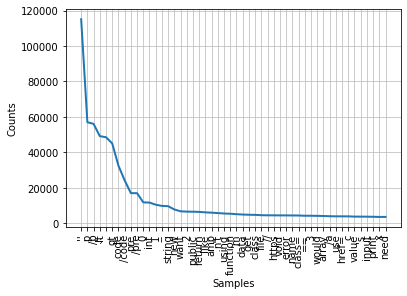

In [10]:
from nltk import FreqDist
import matplotlib.pyplot as plt
FreqDist(words_lqc).plot(50);
# plt.show()

Or if you want to do a document analysis (like a TF-IDF type of analysis), you can use a lambda function to alter data in the dataframe.

In [11]:
def toklowstop(text):
    tokens = word_tokenize(text)
    # converts to lower case
    tokens = [tok.lower() for tok in tokens]
    # removes the stopwords
    words = [word for word in tokens if word not in stop_words]
    return words

In [12]:
df['Body'].apply(lambda x: toklowstop(x))

Id
34552656    [p, 'm, already, familiar, repeating, tasks, e...
34552974    [4, different, tables, like, select, system, s...
34553034    [p, 'd, like, understand, java, 8, optionals, ...
34553174    [p, attempting, overlay, title, image, image, ...
34553318    [p, question, simple, could, find, answer, /p,...
                                  ...                        
60467932    [p, try, multiply, integer, double, obtain, wr...
60468018    [p, 'm, new, programming, 'm, teaching, made, ...
60468378    [urls.py, //urls.py, file, django.contrib, imp...
60469392    [p, controller, inside, server, connected, net...
60470323    [p, recently, helping, someone, code, overload...
Name: Body, Length: 60000, dtype: object

## Wordcloud
Wordclouds are to text data what pie charts are to numerical data. They are at best confusing and at worst useless. But it can be generate a nice picture for your article header :)

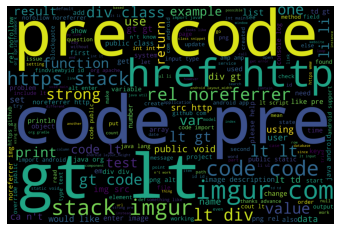

In [13]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000,
                      height = 2000,
                      stopwords = stop_words)

wordcloud.generate(" ".join(words))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Stemming
This process is going to remove the ending of the words, shrinking them to their stem, their common denominator. For example, in the following list:
- programmer
- programmation
- programmed
- programming
- program
- programme

The stem of these words is **program**. It is easy to imagine a stemmed document being harder to read (by a human at least) but at the same time, it is going to be easier to compare different documents. This "normalization" is going to help make a model more robust as the ambiguity is reduced.

It is worth noting:
- there are a lot of stemming algorithms, available in various languages. [nltk.stem API module](https://www.nltk.org/api/nltk.stem.html) will give you a list of stemming classes available with NLTK.
- whilst stemming simplifies a document, it also creates "new" noise:  the stem for "flies" is "fli" for example.
- whilst stemming simplifies a document, it will induce a loss of information. For example, in the "program" list above, programme is the British spelling and program, the American spelling. If the origin of the review is not an important information for your analysis: Great, stemming has made this simpler! However if the localisation is key to your problem, you might miss some nuances by stemming your documents.

In [14]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [15]:
def stem(document):
    """
    Stemming words using 
    """
    doc_split = document.split(' ')
    stemmed = ''
    for word in doc_split:
        stemmed += stemmer.stem(word) + ' '
        
    return stemmed

## Lemmatisation